In [14]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [15]:
params = {
    "sites": 2,
    "hopping": -1, 
    "potential": 2,
}

hubbard_chain = vqe_fermihubbard(params)
hubbard_chain.set_group_characteristics()

In [16]:
ansatz_params = {
    "repetitions": 3,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
}

hubbard_chain.set_device(ansatz_params)
hubbard_chain.set_node(ansatz_params)

rep = ansatz_params["repetitions"]
number = (hubbard_chain.qubits)*rep

In [17]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 100,
    "tol": 0.000001,
    "number": hubbard_chain.qubits*ansatz_params["repetitions"]}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = scipy_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(hubbard_chain.cost_function, hubbard_chain.qubits)

In [18]:
energy[-1]

tensor(-1.70927514, requires_grad=True)

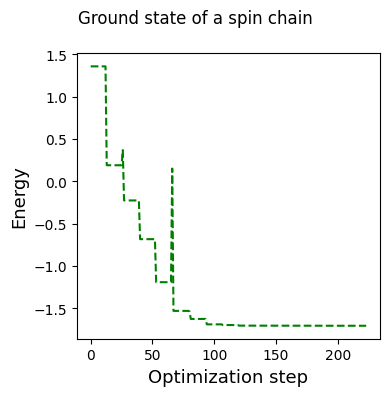

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4,4),)
ax.set_xlabel("Optimization step", fontsize=13)
ax.set_ylabel("Energy", fontsize=13)


fig.suptitle('Ground state of a spin chain', fontsize=12)

ax.plot([i for i in range(len(energy))], energy, "g", ls="dashed")
fig.tight_layout()
plt.show()

In [20]:
qubits = params["sites"]*2
hopping = params["hopping"]
potential = params["potential"]

fermi_sentence = 0.0
coeff = []
expression = []

for i in range(params["sites"]-1):
    fermi_sentence +=  -hopping*( FermiC(2*i)*FermiA(2*i +2) + FermiC(2*i +2)*FermiA(2*i) )
    fermi_sentence +=  -hopping*( FermiC(2*i+1)*FermiA(2*i +3) + FermiC(2*i +3)*FermiA(2*i +1) )
    fermi_sentence +=  potential*FermiC(2*i)*FermiA(2*i)*FermiC(2*i +1)*FermiA(2*i +1) 

h = qml.jordan_wigner( fermi_sentence, ps=True).to_mat(wire_order=[i for i in range(4)])

In [21]:
fermi_sentence

1.0 * a⁺(0) a(2)
+ 1.0 * a⁺(2) a(0)
+ 0.0 * I
+ 1.0 * a⁺(1) a(3)
+ 1.0 * a⁺(3) a(1)
+ 2.0 * a⁺(0) a(0) a⁺(1) a(1)

In [22]:
ee = np.sort( np.linalg.eigvals(h) )
print( np.round(ee,5) )

[-1.70928+0.j -1.     +0.j -1.     +0.j -0.41421+0.j -0.41421+0.j
 -0.     +0.j  0.     +0.j  0.     +0.j  0.     +0.j  0.80606+0.j
  1.     +0.j  1.     +0.j  2.     +0.j  2.41421+0.j  2.41421+0.j
  2.90321+0.j]
